This data cleaning project was sourced from https://www.preppindata.com/challenges. The breakdown of information is as follows.

# 2023: Week 1 The Data Source Bank
January 04, 2023
 Created by: Carl Allchin

Welcome to a New Year of Preppin' Data. These are weekly exercises to help you learn and develop data preparation skills. We publish the challenges on a Wednesday and share a solution the following Tuesday. You can take the challenges whenever you want and we love to see your solutions. With data preparation, there is never just one way to complete the tasks so sharing your solutions will help others learn too. Share on Twitter, LinkedIn, the Tableau Forums or wherever you want to too. Tag Jenny Martin, Tom Prowse or myself or just use the #PreppinData to share your solutions. 

The challenges are designed for learning Tableau Prep but we have a broad community who complete the challenges in R, Python, SQL, DBT, EasyMorph and many other tools. We love seeing people learn new tools so feel free to use whatever tools you want to complete the challenges. 

A New Year means we start afresh so January's challenges will be focused on beginners. We will use different techniques each week to help you develop your skills. In February, we will set the challenges at an intermediate level and then in March we will do some advanced challenges. January's challenges will have links to useful videos and blogposts to help you learn a technique if it is new to you. 

The subject for January will be our new (fake) bank -- The Data Source Bank (DSB). This week we have had a report with a number of transactions that have not just our transactions but other banks' too. Can you help clean up the data?

Input
One csv to input this week. You can download it here: https://drive.google.com/file/d/1oln2ri6nu1wDQfT3gQMLLNlmQ2h6B9d9/view?usp=share_link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Input the data (help)

In [2]:
data = pd.read_csv('PD-2023-Wk-1-Input.csv')

In [3]:
data.head()

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date
0,DTB-716-679-576,1448,100001,2,20/03/2023 00:00:00
1,DS-795-814-303,7839,100001,2,15/11/2023 00:00:00
2,DSB-807-592-406,5520,100005,1,14/07/2023 00:00:00
3,DS-367-545-264,7957,100007,2,18/08/2023 00:00:00
4,DSB-474-374-857,5375,100000,2,26/08/2023 00:00:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction Code     365 non-null    object
 1   Value                365 non-null    int64 
 2   Customer Code        365 non-null    int64 
 3   Online or In-Person  365 non-null    int64 
 4   Transaction Date     365 non-null    object
dtypes: int64(3), object(2)
memory usage: 14.4+ KB


In [5]:
# rename all the columns headers to eleminate all white spaces in the column headers
data = data.rename(columns={'Transaction Code': 'TransactionCode', 'Customer Code': 'CustomerCode','Online or In-Person':'Online-or-In-Person', 'Transaction Date':'Transaction-Date' })

# Split the Transaction Code to extract the letters at the start of the transaction code. These identify the bank who processes the transaction (help) Rename the new field with the Bank code 'Bank'. 

In [6]:
# use regex to extract all the text in the columns
data['Bank'] = data.TransactionCode.str.extract(r'([A-Z]+)', expand=True)

In [7]:
# move the bank column to the from and remove the transanction code column
move = data.pop("Bank")
data.insert(0, 'Bank', move)
data = data.drop(columns=['TransactionCode'])

# Rename the values in the Online or In-person field, Online of the 1 values and In-Person for the 2 values. 

In [8]:
# using the replace method to replace the online and in-person options
data['Online-or-In-Person'] = data['Online-or-In-Person'].replace({1:'Online',2:'In-Person'})

In [10]:
data.head()

,Bank,Value,CustomerCode,Online-or-In-Person,Transaction-Date
0,DTB,1448,100001,In-Person,20/03/2023 00:00:00
1,DS,7839,100001,In-Person,15/11/2023 00:00:00
2,DSB,5520,100005,Online,14/07/2023 00:00:00
3,DS,7957,100007,In-Person,18/08/2023 00:00:00
4,DSB,5375,100000,In-Person,26/08/2023 00:00:00


# Change the date to be the day of the week (help)

In [11]:
# changing the date format to extract the day of the week and show the day only
data['Transaction-Date']= pd.to_datetime(data['Transaction-Date'])
data['Transaction-Date']= data['Transaction-Date'].dt.day_name()

In [12]:
data.head()

,Bank,Value,CustomerCode,Online-or-In-Person,Transaction-Date
0,DTB,1448,100001,In-Person,Monday
1,DS,7839,100001,In-Person,Wednesday
2,DSB,5520,100005,Online,Friday
3,DS,7957,100007,In-Person,Friday
4,DSB,5375,100000,In-Person,Saturday


# Different levels of detail are required in the outputs. You will need to sum up the values of the transactions in three ways (help):


# 1. Total Values of Transactions by each bank

In [13]:
total_by_bank = data.groupby("Bank")["Value"].sum().reset_index()
total_by_bank

,Bank,Value
0,DS,653940
1,DSB,530489
2,DTB,618238


In [ ]:
for pos, row in total_by_bank.iterrows():
    plt.annotate(f"{total_by_bank['Value'][row]}", xy=(0, 0), xytext=(10, 10), textcoords="offset points",color='w', ha="center", va="top")

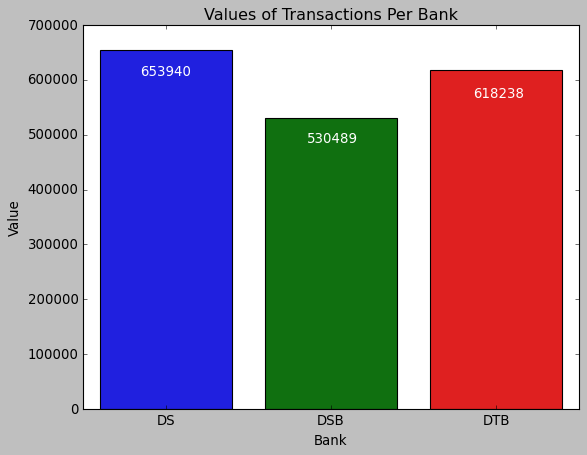

In [76]:
sns.barplot(data = data, x=total_by_bank['Bank'],y=total_by_bank['Value'])
plt.style.use("classic")
plt.annotate(f"{total_by_bank['Value'][0]}", xy=(0, 0), xytext=(0, 310), textcoords="offset points",color='w', ha="center", va="top")
plt.annotate(f"{total_by_bank['Value'][1]}", xy=(0, 0), xytext=(150, 250), textcoords="offset points",color='w', ha="center", va="top")
plt.annotate(f"{total_by_bank['Value'][2]}", xy=(0, 0), xytext=(300, 290), textcoords="offset points",color='w', ha="center", va="top")
#plt.xticks(rotation=90, ha='right')
plt.title('Values of Transactions Per Bank');

# 2. Total Values by Bank, Day of the Week and Type of Transaction (Online or In-Person)

In [77]:
total_by_bank_day_type = data.groupby(['Bank', 'Transaction-Date', 'Online-or-In-Person'])['Value'].sum().reset_index()
total_by_bank_day_type

,Bank,Transaction-Date,Online-or-In-Person,Value
0,DS,Friday,In-Person,58599
1,DS,Friday,Online,58731
2,DS,Monday,In-Person,42806
3,DS,Monday,Online,33563
4,DS,Saturday,In-Person,34867
5,DS,Saturday,Online,71357
6,DS,Sunday,In-Person,51301
7,DS,Sunday,Online,21761
8,DS,Thursday,In-Person,75582
9,DS,Thursday,Online,13337


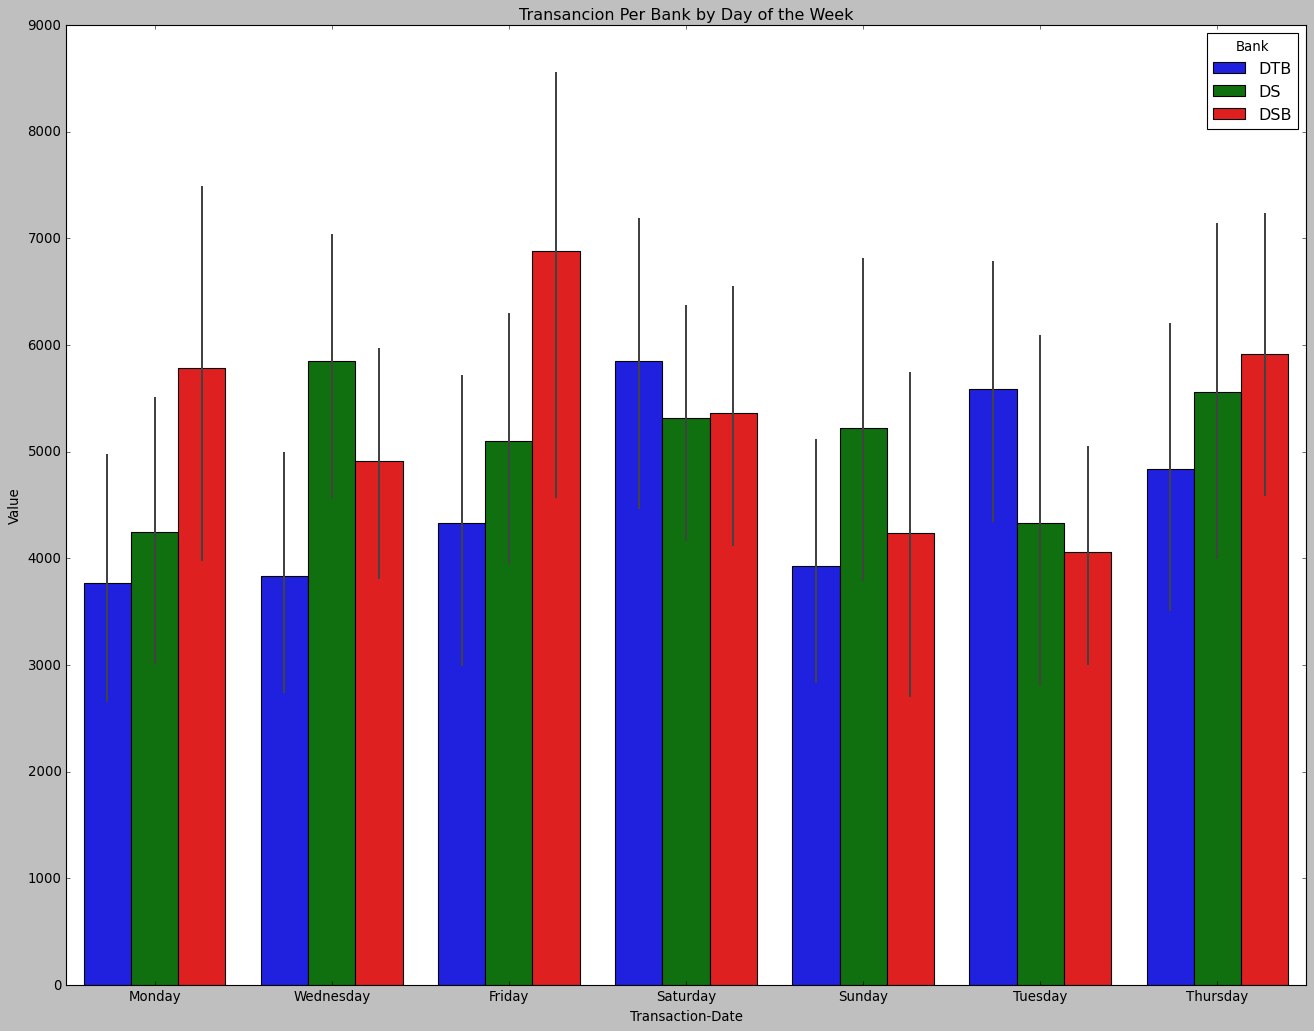

In [112]:
plt.figure(figsize=(20,15))
sns.barplot(data = data, x=data['Transaction-Date'],y=data['Value'], hue='Bank')
plt.title('Transancion Per Bank by Day of the Week');

# 3. Total Values by Bank and Customer Code

In [28]:
total_value_by_cus = data.groupby(['Bank','CustomerCode'])['Value'].sum().reset_index()
total_value_by_cus

,Bank,CustomerCode,Value
0,DS,100000,57909
1,DS,100001,53063
2,DS,100002,69803
3,DS,100003,25482
4,DS,100004,63315
5,DS,100005,39668
6,DS,100006,77636
7,DS,100007,76190
8,DS,100008,56400
9,DS,100009,56581


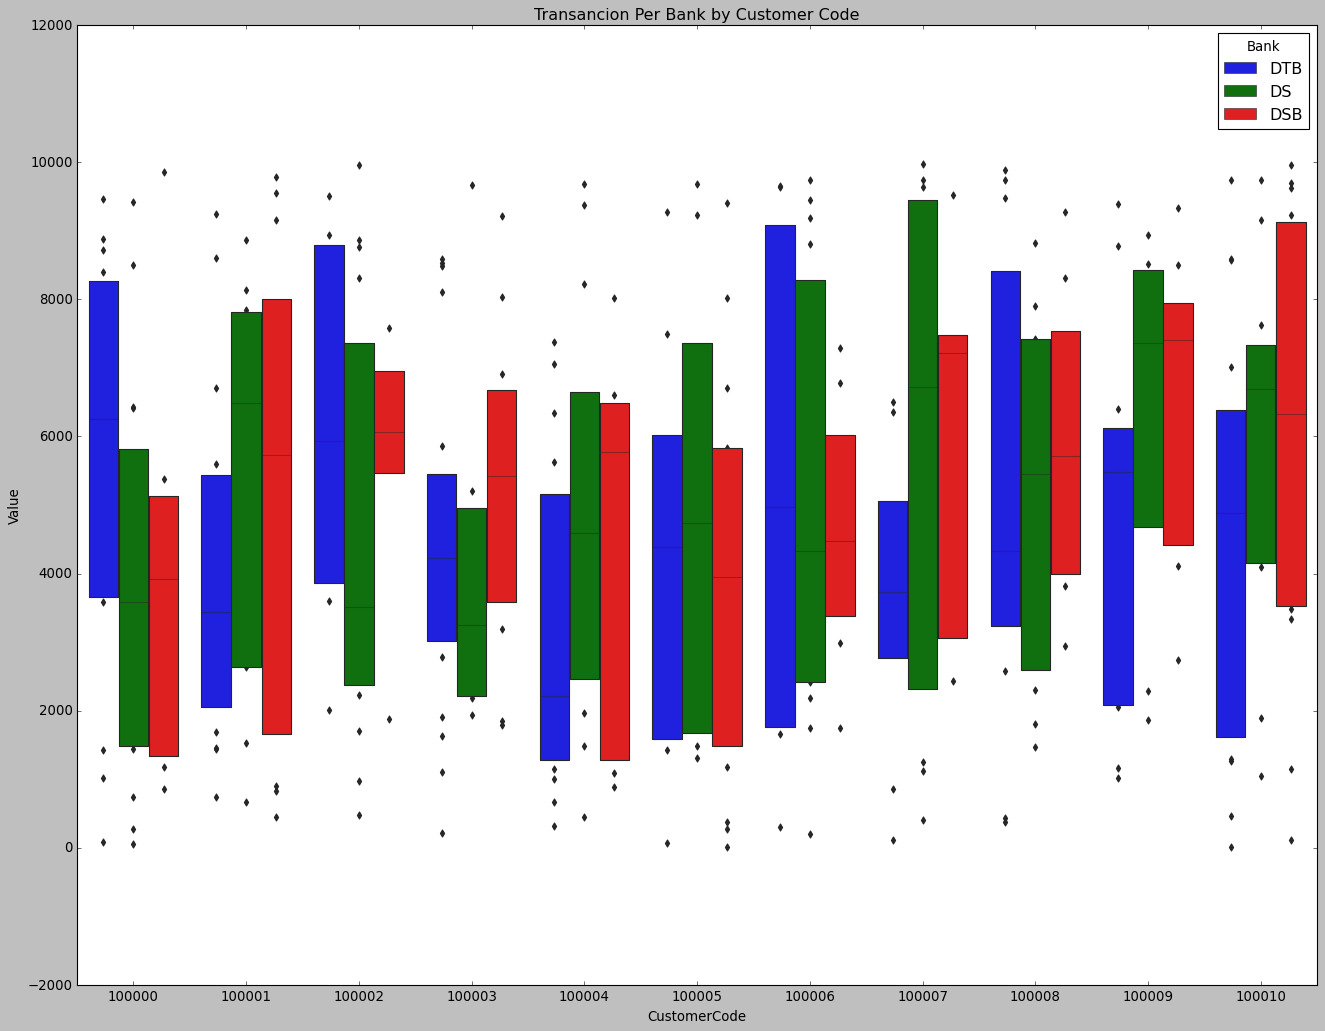

In [127]:
plt.figure(figsize=(20,15))
sns.boxenplot(data = data, x=data['CustomerCode'],y=data['Value'], hue='Bank')
plt.title('Transancion Per Bank by Customer Code');